## **VISÃO COMPUTACIONAL - AULA 06**

**Objetivos da aula:**

*   conhecer o problema de detecção de contorno em imagens
*   conhecer e praticar com métodos baseados em variação de função
*   conhecer e praticar com métodos baseados em variação de derivada primeira de função
*   conhecer e praticar com métodos baseados em variação de derivada segunda de função










## **DETECÇÃO DE CONTORNOS (BORDOS)**

Um **contorno** ou **bordo** de uma imagem 2D  é um segmento poligonal que divide regiões de intensidades distintas. Abaixo, temos um exemplo de cálculo de contorno de uma imagem 2D, realizada pelo filtro de Canny.


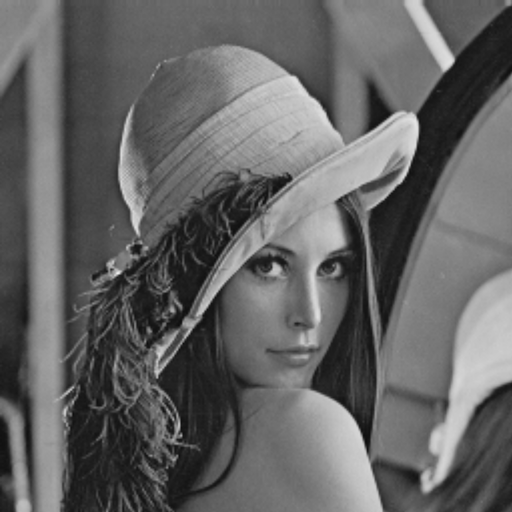

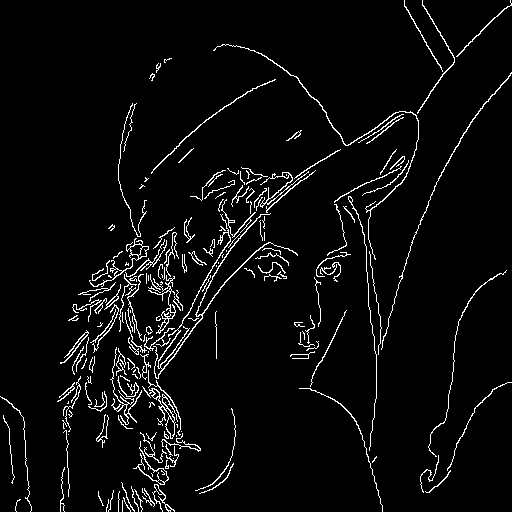

In [2]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

img = cv.cvtColor(cv.imread('lena.png'), cv.COLOR_BGR2GRAY)
edges = cv.Canny(img,100,200)
cv2_imshow(img)
cv2_imshow(edges)

Existem diversas abordagens para cálculo de contornos de imagem: a própria função f(x,y) da imagem, sua derivada primeira f' e sua derivada segunda f''.

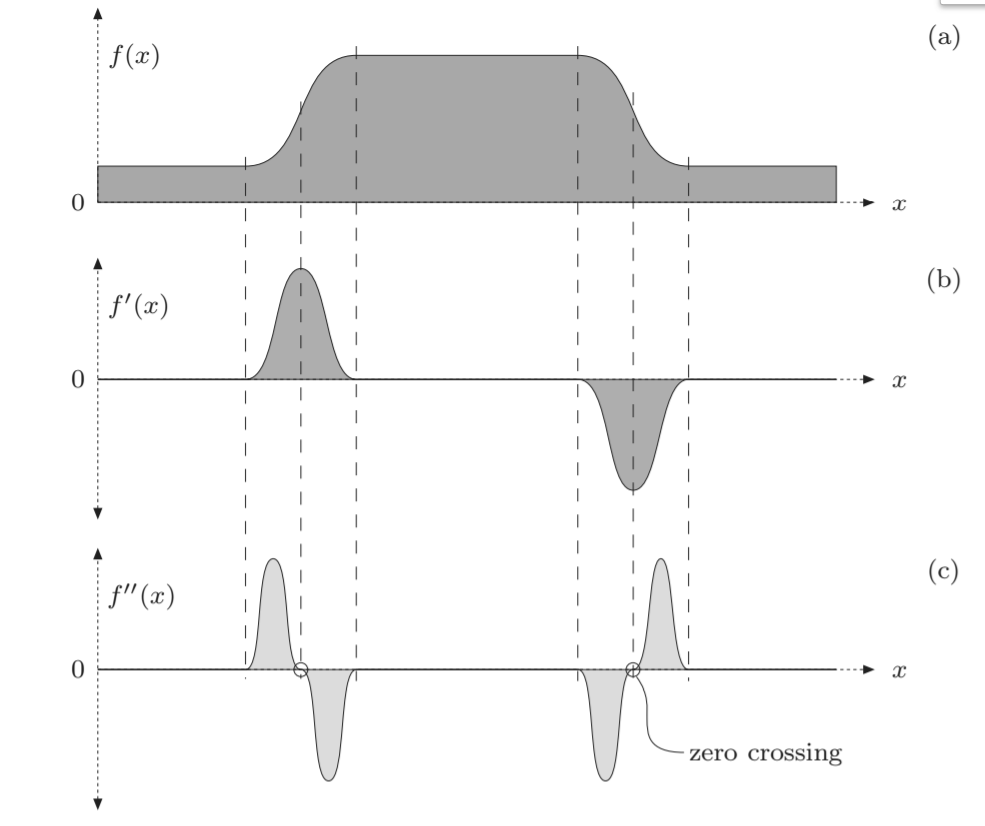

In [4]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

img = cv.cvtColor(cv.imread('edges.png'), cv.COLOR_BGR2GRAY)
cv2_imshow(img)

## **EXERCÍCIO**

Conforme visto acima, a detecção de contornos depende da variação da função da própria função f(x,y) da imagem, ou de sua derivada primeira ou mesmo de sua derivada segunda.Seu objetivo neste exercício será implementar a deteção de contornos usando somente a variação da função f(x,y):

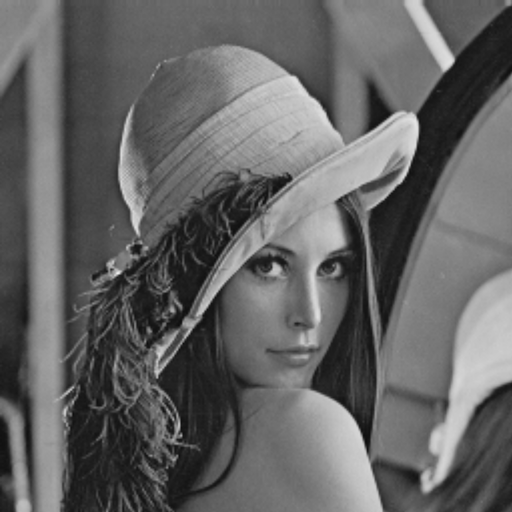

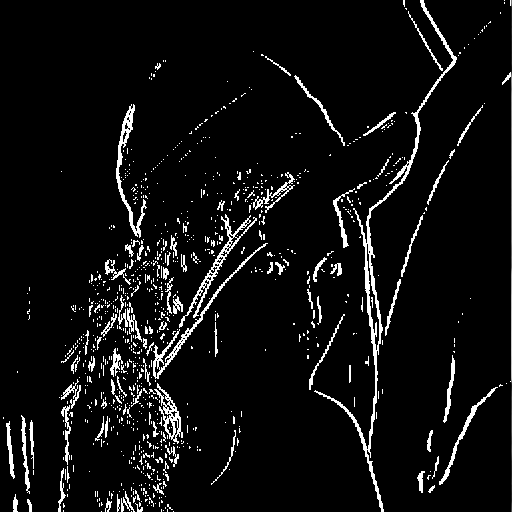

In [7]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

img = cv.cvtColor(cv.imread('lena.png'), cv.COLOR_BGR2GRAY).astype(np.int32)
cv2_imshow(img)
rows, cols=img.shape
T=15
for l in range(rows):
  for c in range(cols-1):
    if abs(img[l,c]-img[l,c+1])>T:
      img[l,c]=255
    else:
      img[l,c]=0
cv2_imshow(img)

A variação da função também pode ser calculada através de um produto de convolução da imagem por um kernel de variação:

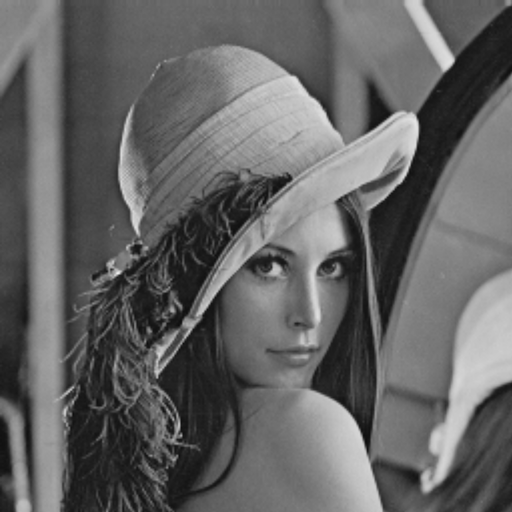

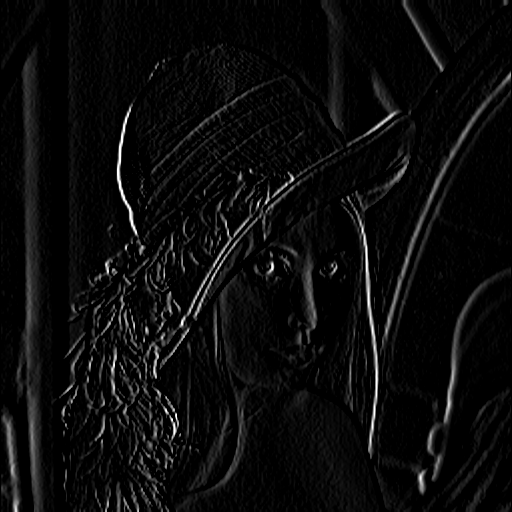

In [6]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

img = cv.cvtColor(cv.imread('lena.png'), cv.COLOR_BGR2GRAY)
cv2_imshow(img)

kernel = np.array((
	[-1, 0, 1],
	[-1, 0, 1],
	[-1, 0, 1]), dtype="int")

imgf= cv.filter2D(img,-1, kernel)  # -1 indica que a profundidade de cores da saída será a mesma da entrada
cv2_imshow(imgf)




## **DETECÇÃO DE CONTORNOS COM A PRIMEIRA DERIVADA**

O Filtro de Sobel aproxima o gradiente (derivada primeira) da função f(x,y), obtendo dois filtros de detecção de contornos: um para horizontal e outro para vertical.


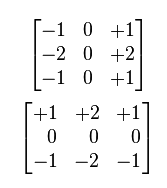

In [ ]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

img = cv.cvtColor(cv.imread('sobel.png'), cv.COLOR_BGR2GRAY)
cv2_imshow(img)

Para aplicar estes dois filtros, usamos as seguintes funções em OpenCV:

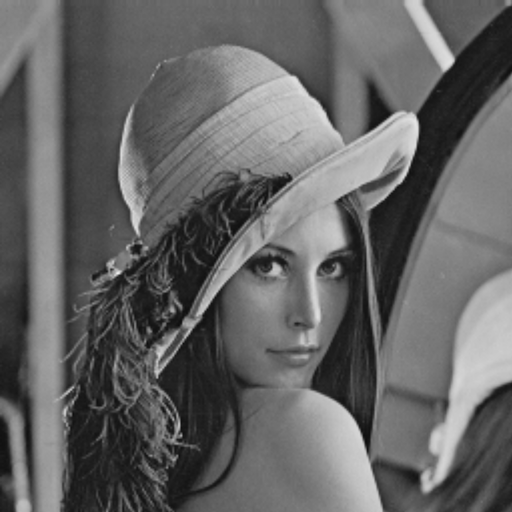

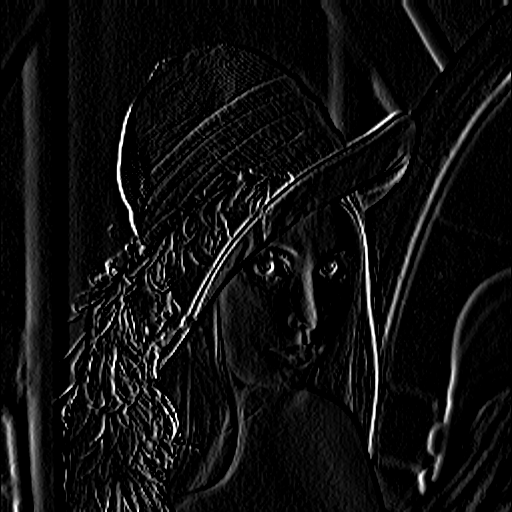

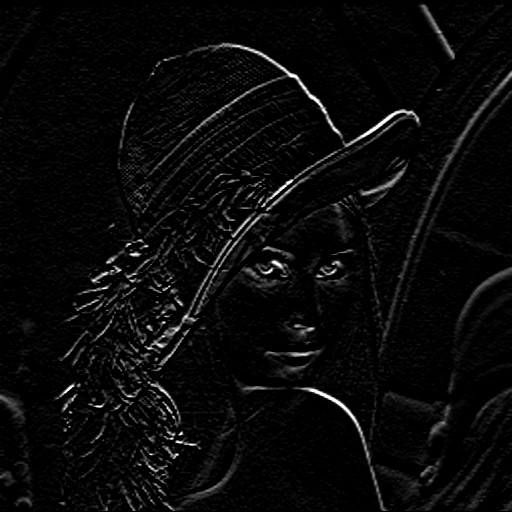

In [8]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

img = cv.cvtColor(cv.imread('lena.png'), cv.COLOR_BGR2GRAY)
cv2_imshow(img)
sobelx = cv.Sobel(img,cv.CV_64F,1,0)
sobely = cv.Sobel(img,cv.CV_64F,0,1)
cv2_imshow(sobelx)
cv2_imshow(sobely)

## **EXERCÍCIO**

Aplique os filtros de Sobel utilizando o operador de convolução da OpenCV:

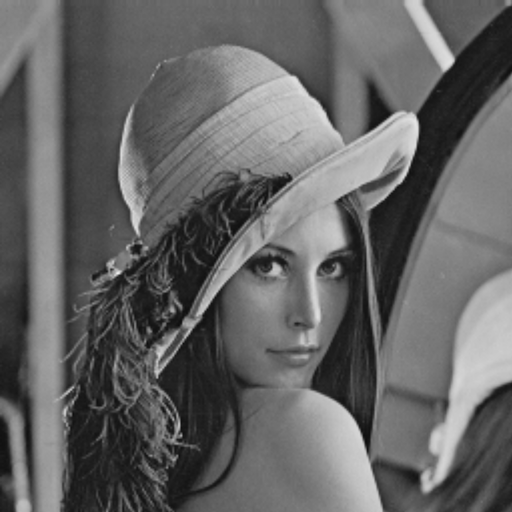

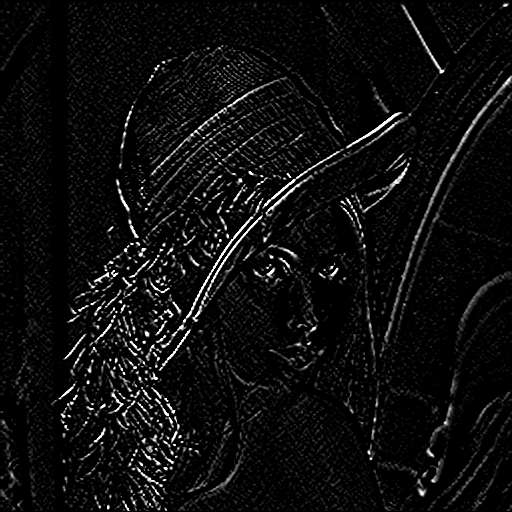

In [9]:
img = cv.cvtColor(cv.imread('lena.png'), cv.COLOR_BGR2GRAY)
cv2_imshow(img)

kernel = np.array((
	[-1, 0, 1],
	[-2, 0, 2],
	[-1, 0, 1]), dtype="int")

img= cv.filter2D(img,-1, kernel)  # -1 indica que a profundidade de cores da saída será a mesma da entrada

kernel = np.array((
	[1, 2, 1],
	[0, 0, 0],
	[-1, -2, -1]), dtype="int")
img= cv.filter2D(img,-1, kernel)
cv2_imshow(img)

## **DETECÇÃO DE CONTORNOS COM O FILTRO DE CANNY**

O Filtro de Canny oferece uma maneira alternativa de uso do gradiente da função, sendo um método bastante usado em OpenCV. A Teoria do Filtro de Canny encontra-se abaixo:

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html

Vamos aplicá-lo novamente a imagem, como vimos no início da aula:

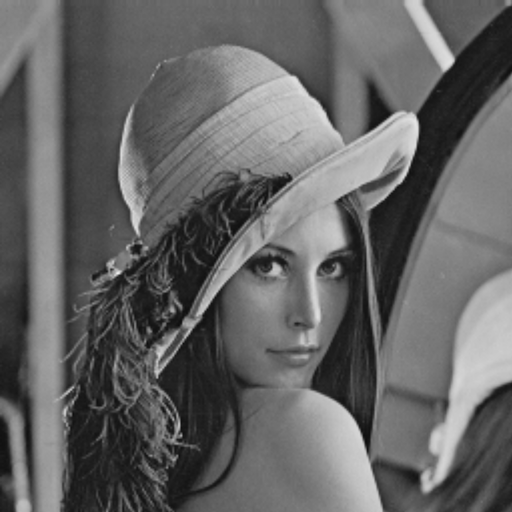

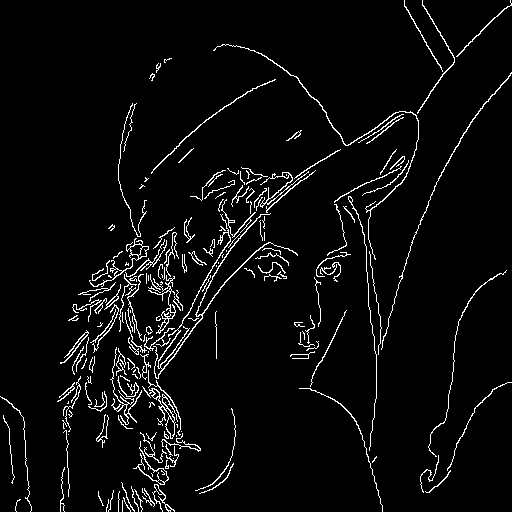

In [10]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

img = cv.cvtColor(cv.imread('lena.png'), cv.COLOR_BGR2GRAY)
edges = cv.Canny(img,100,200)
cv2_imshow(img)
cv2_imshow(edges)

## **EXERCÍCIO**

Aplique o Filtro de Canny com diferentes valores de minVal e maxVal, observando as diferenças de aplicação:

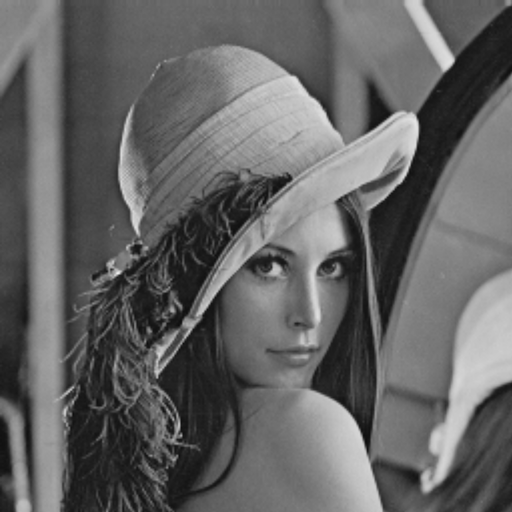

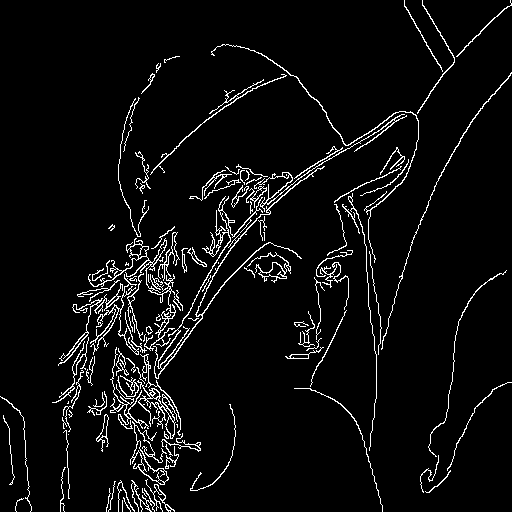

In [11]:
img = cv.cvtColor(cv.imread('lena.png'), cv.COLOR_BGR2GRAY)
edges = cv.Canny(img,50,220)
cv2_imshow(img)
cv2_imshow(edges)

## **DETECÇÃO DE CONTORNOS COM A SEGUNDA DERIVADA**

O Filtro Laplaciano aproxima o laplaciano (derivada segunda) da função f(x,y), obtendo a seguinte matriz de filtro:

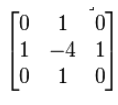

In [ ]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

img = cv.cvtColor(cv.imread('laplacian.png'), cv.COLOR_BGR2GRAY)
cv2_imshow(img)

Para aplicar o filtro laplaciano para detecção de bordos, usamos o seguinte código em OpenCV:

In [ ]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

img = cv.cvtColor(cv.imread('lena.png'), cv.COLOR_BGR2GRAY)
cv2_imshow(img)
lap = cv.Laplacian(img,cv.CV_64F)
cv2_imshow(lap)

## **EXERCÍCIO**

Aplique o filtro laplaciano utilizando o operador de convolução da OpenCV:

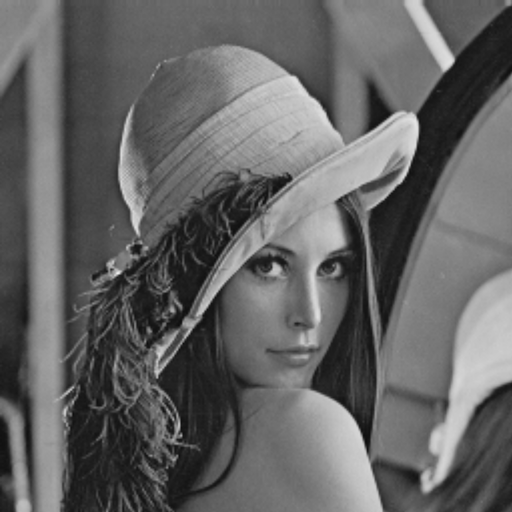

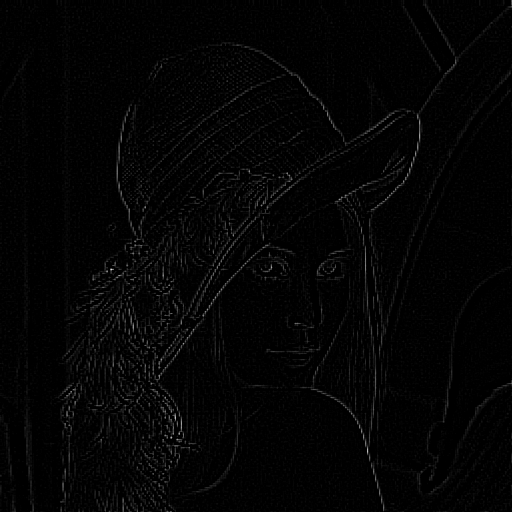

In [12]:
img = cv.cvtColor(cv.imread('lena.png'), cv.COLOR_BGR2GRAY)
cv2_imshow(img)

kernel = np.array((
	[1, 0, 1],
	[0, -4, 0],
	[1, 0, 1]), dtype="int")

img= cv.filter2D(img,-1, kernel)  # -1 indica que a profundidade de cores da saída será a mesma da entrada
cv2_imshow(img)